<a href="https://colab.research.google.com/github/pachterlab/MBGBLHGP_2019/blob/master/notebooks/lostcount_ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/pachterlab/MBGBLHGP_2019.git

Cloning into 'MBGBLHGP_2019'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 831 (delta 4), reused 50 (delta 4), pack-reused 778
Receiving objects: 100% (831/831), 2.41 GiB | 29.45 MiB/s, done.
Resolving deltas: 100% (222/222), done.
Checking out files: 100% (365/365), done.


In [2]:
!gunzip -r /content/MBGBLHGP_2019/data/lostcount_ratio/*

In [3]:
import glob
import pandas as pd
import numpy as np
import pandas as pd
import scipy as scp
import sklearn
import itertools
from scipy.optimize import fsolve
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches

from collections import Counter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
%config InlineBackend.figure_format = 'retina'

In [4]:
v2_names = np.array([
    'SRR8599150_v2',  # 0             
#    'SRR7692543_v2',  # 1          
    'heart1k_v2',     # 2         
    'SRR8611943_v2',  # 3          
    'SRR8257100_v2',  # 4            
    'EMTAB7320_v2',   # 5          
    'SRR7299563_v2',  # 6           
    'SRR8513910_v2',  # 7           
    'SRR8639063_v2',  # 8           
    'SRR8524760_v2',  # 9           
    'SRR6956073_v2',  # 10           
    'hgmm1k_v2',      # 11       
    'SRR8206317_v2',  # 12           
    'SRR8327928_v2',  # 13           
    'SRR6998058_v2'], dtype=object) # 14

v3_names = np.array([
    'pbmc1k_v3', 
    'hgmm10k_v3',
    'neuron10k_v3',
    'pbmc10k_v3',
    'heart1k_v3', 
    'hgmm1k_v3'], dtype=object)

v2_data = {}
v2_data['SRR8599150_v2']  = {"n_reads": 8860361}
#v2_data['SRR7692543_v2']  = {"n_reads": 50003135}
v2_data['heart1k_v2']  = {"n_reads": 88872840}
v2_data['SRR8611943_v2']  = {"n_reads": 21574502}
v2_data['SRR8257100_v2']  = {"n_reads": 189337914}
v2_data['EMTAB7320_v2']  = {"n_reads": 335147976}
v2_data['SRR7299563_v2']  = {"n_reads": 112176350}
v2_data['SRR8513910_v2']  = {"n_reads": 146617182}
v2_data['SRR8639063_v2']  = {"n_reads": 416437344}
v2_data['SRR8524760_v2']  = {"n_reads": 97106426}
v2_data['SRR6956073_v2'] = {"n_reads": 161274652}
v2_data['hgmm1k_v2'] = {"n_reads": 75225120}
v2_data['SRR8206317_v2'] = {"n_reads": 85992089}
v2_data['SRR8327928_v2'] = {"n_reads": 190094560}
v2_data['SRR6998058_v2'] = {"n_reads": 37227612}






v3_data = {}

v3_data['pbmc1k_v3'] = {"n_reads": 66601887}
v3_data['hgmm10k_v3'] = {"n_reads": 721180737}
v3_data['neuron10k_v3'] = {"n_reads": 357111595}
v3_data['pbmc10k_v3'] = {"n_reads": 638901019}
v3_data['heart1k_v3'] = {"n_reads": 84512390}
v3_data['hgmm1k_v3'] = {"n_reads": 63105786}


In [5]:
%%time
for f in glob.glob("/content/MBGBLHGP_2019/data/lostcount_ratio/*"):
    name = f.split("/")[-1]
    print(name)
    if "v2" in name:
        v2_data[name]["loss_ratio"] = pd.read_csv(f + "/lossratio.txt", header=None).values.flatten()

        
    elif "v3" in name:
        v3_data[name]["loss_ratio"] = pd.read_csv(f + "/lossratio.txt", header=None).values.flatten()

pbmc10k_v3
heart1k_v2
neuron10k_v3
SRR8599150_v2
hgmm1k_v2
SRR7299563_v2
SRR6956073_v2
SRR8639063_v2
pbmc1k_v3
SRR6998058_v2
SRR8206317_v2
SRR8327928_v2
SRR8524760_v2
SRR8611943_v2
hgmm10k_v3
heart1k_v3
EMTAB7320_v2
SRR8257100_v2
hgmm1k_v3
SRR8513910_v2
CPU times: user 40.5 s, sys: 2.73 s, total: 43.2 s
Wall time: 45.8 s


In [6]:
data = [v2_data[i]["loss_ratio"] for i in v2_names]


[data.append(v3_data[i]["loss_ratio"]) for i in v3_names]

names = v2_names 
n3 = v3_names
names = np.append(names, n3)

nreads = [v2_data[i]["n_reads"] for i in v2_names]
[nreads.append(v3_data[i]["n_reads"]) for i in v3_names]

idx_sorted = np.argsort(nreads)
sorted_nreads = np.sort(nreads)

data = np.array(data)[idx_sorted]

names = names[idx_sorted]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


# This will run, it just takes a while since there are many points

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


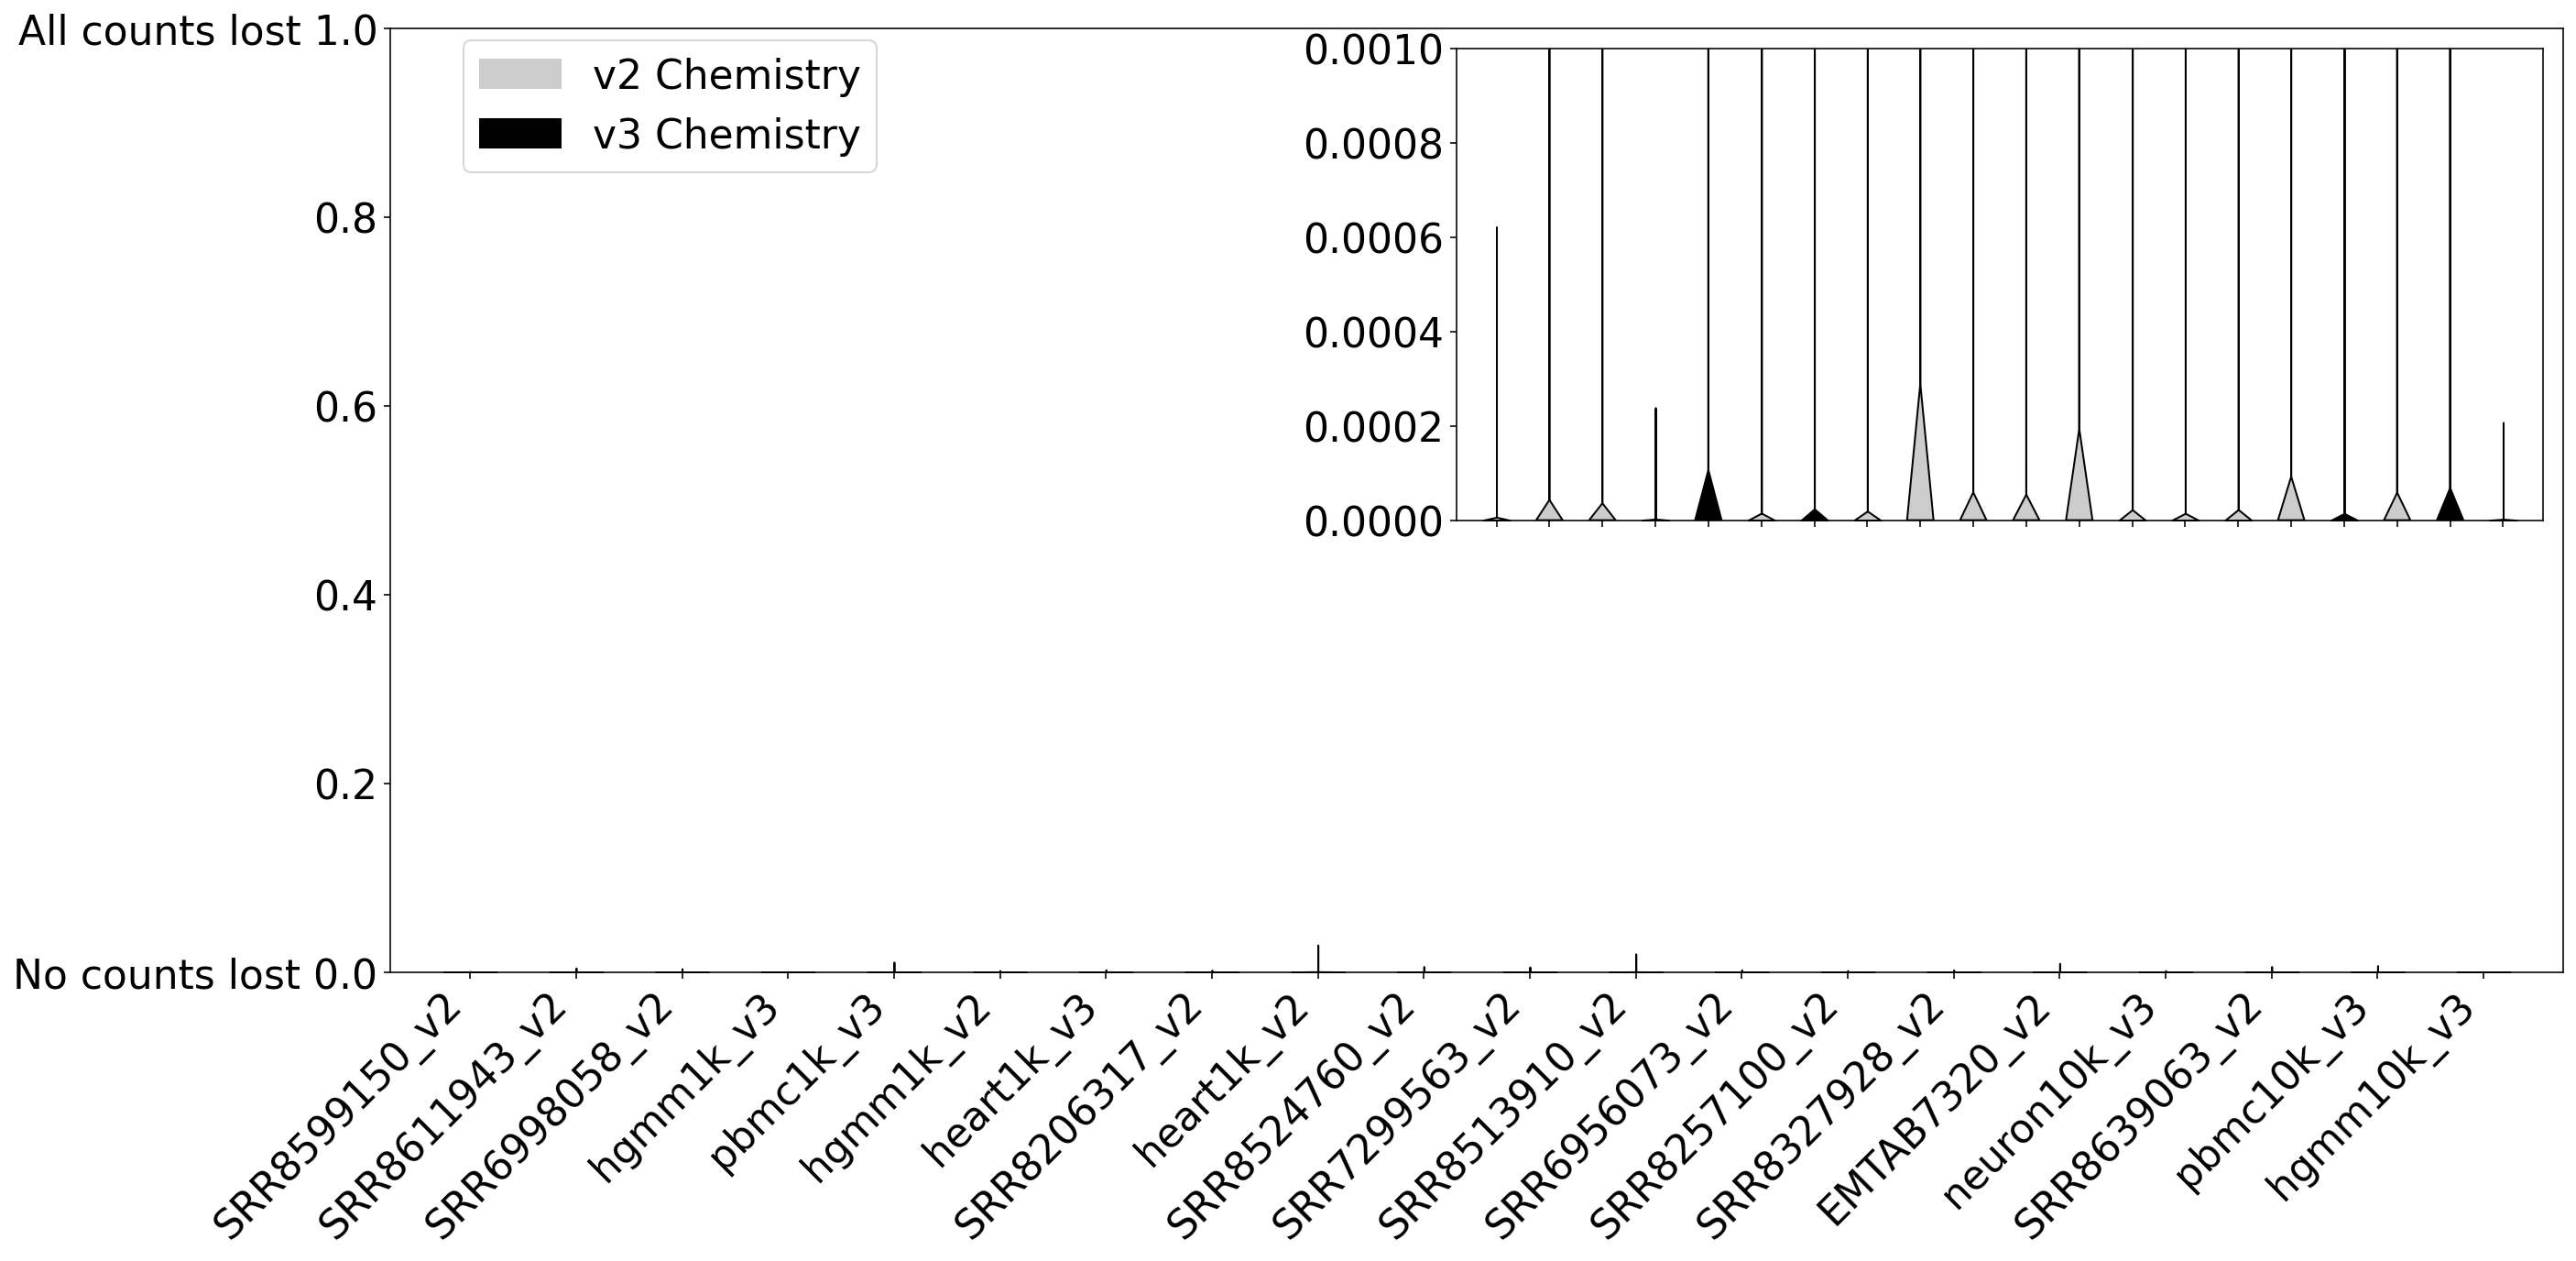

In [7]:
kallisto_color_v2 = '#cccccc'
kallisto_color_v3 = 'black'


def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_ylim(0, 1)
    #ax.set_xlabel('Sample name')

fig, ax = plt.subplots(figsize=(20, 10), nrows=1, ncols=1)


################
parts = ax.violinplot(data, showmeans=False, showmedians=False,showextrema=False)


for pc_i in range(len(parts['bodies'])):
    if "v2" in names[pc_i]:
        parts['bodies'][pc_i].set_facecolor(kallisto_color_v2)
    elif "v3" in names[pc_i]:
        parts['bodies'][pc_i].set_facecolor(kallisto_color_v2)
    parts['bodies'][pc_i].set_edgecolor('black')
    parts['bodies'][pc_i].set_alpha(1)

# set style for the axes
set_axis_style(ax, names)

inset = inset_axes(ax, width="50%", height="50%", loc=1)

parts = inset.violinplot(data, showmeans=False, showmedians=False,showextrema=False)

for pc_i in range(len(parts['bodies'])):
    if "v2" in names[pc_i]:
        parts['bodies'][pc_i].set_facecolor(kallisto_color_v2)
    elif "v3" in names[pc_i]:
        parts['bodies'][pc_i].set_facecolor(kallisto_color_v3)
    parts['bodies'][pc_i].set_edgecolor('black')
    parts['bodies'][pc_i].set_alpha(1)

    
set_axis_style(inset, names)

inset.set_xticklabels([])
inset.set_ylim(0, 0.001)


ticks = ax.get_yticks().tolist()
ticks = ["{:.1f}".format(i) for i in ticks]
ticks[0] = "No counts lost 0.0"
ticks[-1] = "All counts lost 1.0"

#for tick in ax.get_xticklabels():
#    tick.set_rotation(45, ha="right")

ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")


grey_patch = mpatches.Patch(color=kallisto_color_v2, label='v2 Chemistry')
black_patch = mpatches.Patch(color=kallisto_color_v3, label='v3 Chemistry')

ax.figure.legend(handles=[grey_patch, black_patch], loc=1, bbox_to_anchor=(0.34,0.94))

ax.yaxis.set_ticklabels(ticks)
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.tight_layout()
#plt.savefig("lossratio.pdf")
plt.show()

In [8]:
loss2 = [v2_data[i]["loss_ratio"] for i in v2_names]
loss3 = [v3_data[i]["loss_ratio"] for i in v3_names]

In [9]:
for i in range(len(v2_names)):
    print("{:,.4f}% \t {}".format(loss2[i].mean()*100, v2_names[i]))

0.0001% 	 SRR8599150_v2
0.0005% 	 heart1k_v2
0.0001% 	 SRR8611943_v2
0.0001% 	 SRR8257100_v2
0.0002% 	 EMTAB7320_v2
0.0004% 	 SRR7299563_v2
0.0004% 	 SRR8513910_v2
0.0005% 	 SRR8639063_v2
0.0011% 	 SRR8524760_v2
0.0002% 	 SRR6956073_v2
0.0002% 	 hgmm1k_v2
0.0002% 	 SRR8206317_v2
0.0002% 	 SRR8327928_v2
0.0005% 	 SRR6998058_v2


In [10]:
for i in range(len(v3_names)):
    print("{:,.4f}% \t {}".format(loss3[i].mean(), v3_names[i]))

0.0000% 	 pbmc1k_v3
0.0000% 	 hgmm10k_v3
0.0000% 	 neuron10k_v3
0.0000% 	 pbmc10k_v3
0.0000% 	 heart1k_v3
0.0000% 	 hgmm1k_v3


In [11]:
(np.array([loss2[i].mean() for i in range(len(loss2))])).mean()*100

0.00034356116387134974